# **Car Price Prediction**

importing all the needed libraries for this project.

uploading the csv file to colab-drive.


In [283]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import io
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix 

In [284]:
data=files.upload()


print('Start')

Start


Reading the Csv file.

checking the data it conatins

In [286]:
df=pd.read_csv('Car details v3.csv')

In [287]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [288]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


Range index 301 means th 300 rows.
Data columns 9.

dtypes contain 4 object and for later use may need conversion to int  values.

checking null value


In [289]:
df.isnull().any()

name             False
year             False
selling_price    False
km_driven        False
fuel             False
seller_type      False
transmission     False
owner            False
mileage           True
engine            True
max_power         True
torque            True
seats             True
dtype: bool

In [290]:
df = df.dropna()

In [291]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [292]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [293]:
car_data = df[['year', 'selling_price',  'km_driven','fuel', 'seller_type', 'transmission', 'owner','mileage','engine', 'max_power',  'seats']]
#car_data = df[['year', 'selling_price',  'km_driven']]

In [294]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 8127
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           7906 non-null   int64  
 1   selling_price  7906 non-null   int64  
 2   km_driven      7906 non-null   int64  
 3   fuel           7906 non-null   object 
 4   seller_type    7906 non-null   object 
 5   transmission   7906 non-null   object 
 6   owner          7906 non-null   object 
 7   mileage        7906 non-null   object 
 8   engine         7906 non-null   object 
 9   max_power      7906 non-null   object 
 10  seats          7906 non-null   float64
dtypes: float64(1), int64(3), object(7)
memory usage: 741.2+ KB


In [295]:
car_data['mileage'] = car_data['mileage'].astype('string')
car_data['mileage'] = car_data['mileage'].str.extract(r'(\d+.\d+)').astype('float')
car_data['mileage'] 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0       23.40
1       21.14
2       17.70
3       23.00
4       16.10
        ...  
8123    18.50
8124    16.80
8125    19.30
8126    23.57
8127    23.57
Name: mileage, Length: 7906, dtype: float64

In [296]:
car_data['engine'] = car_data['engine'].astype('string')
car_data['engine'] = car_data['engine'].str.extract(r'(\d+)').astype('int')
car_data['engine']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0       1248
1       1498
2       1497
3       1396
4       1298
        ... 
8123    1197
8124    1493
8125    1248
8126    1396
8127    1396
Name: engine, Length: 7906, dtype: int64

In [297]:
car_data['max_power'] = car_data['max_power'].astype('string')
car_data['max_power'] = car_data['max_power'].str.extract(r'(\d+)').astype('int')
car_data['max_power']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0        74
1       103
2        78
3        90
4        88
       ... 
8123     82
8124    110
8125     73
8126     70
8127     70
Name: max_power, Length: 7906, dtype: int64

In [298]:
car_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 8127
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           7906 non-null   int64  
 1   selling_price  7906 non-null   int64  
 2   km_driven      7906 non-null   int64  
 3   fuel           7906 non-null   object 
 4   seller_type    7906 non-null   object 
 5   transmission   7906 non-null   object 
 6   owner          7906 non-null   object 
 7   mileage        7906 non-null   float64
 8   engine         7906 non-null   int64  
 9   max_power      7906 non-null   int64  
 10  seats          7906 non-null   float64
dtypes: float64(2), int64(5), object(4)
memory usage: 741.2+ KB


In [299]:
car_data.head(100)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78,5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88,5.0
...,...,...,...,...,...,...,...,...,...,...,...
99,2017,725000,110000,Diesel,Individual,Manual,First Owner,22.54,1396,88,5.0
100,2009,185000,77000,Petrol,Dealer,Manual,Second Owner,21.79,998,67,5.0
101,2010,200000,100000,Diesel,Individual,Manual,Second Owner,18.80,1248,90,5.0
102,2019,615000,10000,Petrol,Individual,Manual,First Owner,21.21,1197,81,5.0


In [300]:
print(car_data['seller_type'].unique())
print(car_data['transmission'].unique())
print(car_data['fuel'].unique())
print(car_data['owner'].unique())


['Individual' 'Dealer' 'Trustmark Dealer']
['Manual' 'Automatic']
['Diesel' 'Petrol' 'LPG' 'CNG']
['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']


In [301]:
car_data = car_data[car_data['fuel'] != "CNG"]
car_data = car_data[car_data['fuel'] != "LPG"]

print(car_data['fuel'].value_counts())

Diesel    4299
Petrol    3520
Name: fuel, dtype: int64


In [302]:
car_data = car_data[car_data['owner'] != "Test Drive Car"]
car_data = car_data[car_data['owner'] != "Fourth & Above Owner"]

print(car_data['owner'].value_counts())

First Owner     5165
Second Owner    1988
Third Owner      503
Name: owner, dtype: int64


In [303]:
car_data = car_data[car_data['seller_type'] != "Trustmark Dealer"]
car_data.groupby('seller_type').count()

,year,selling_price,km_driven,fuel,transmission,owner,mileage,engine,max_power,seats
seller_type,,,,,,,,,,
Dealer,1101,1101,1101,1101,1101,1101,1101,1101,1101,1101
Individual,6319,6319,6319,6319,6319,6319,6319,6319,6319,6319


Above line is used to drop null values within the data if any of the rows conatained them.

Need To Convert Categorical Value to numerical Value.

car name has huge categorical value so will be dropped.

In [304]:
car_data['transmission'] = car_data['transmission'].replace({'Manual':0, 'Automatic':1})
car_data['fuel'] = car_data['fuel'].replace({'Petrol':0, 'Diesel':1,'CNG':2,'LPG':3})
car_data['seller_type'] = car_data['seller_type'].replace({'Dealer':0, 'Individual':1,'Trustmark Dealer':2})
car_data['owner'] = car_data['owner'].replace({'First Owner':0, 'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3,'Test Drive Car':4})

car_data[['transmission','fuel','seller_type','owner']]

,transmission,fuel,seller_type,owner
0,0,1,1,0
1,0,1,1,1
2,0,0,1,2
3,0,1,1,0
4,0,0,1,0
...,...,...,...,...
8122,0,1,1,1
8123,0,0,1,0
8125,0,1,1,0
8126,0,1,1,0


In [305]:
car_data['Car_Age']= 2022-car_data['year']
car_data

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,Car_Age
0,2014,450000,145500,1,1,0,0,23.40,1248,74,5.0,8
1,2014,370000,120000,1,1,0,1,21.14,1498,103,5.0,8
2,2006,158000,140000,0,1,0,2,17.70,1497,78,5.0,16
3,2010,225000,127000,1,1,0,0,23.00,1396,90,5.0,12
4,2007,130000,120000,0,1,0,0,16.10,1298,88,5.0,15
...,...,...,...,...,...,...,...,...,...,...,...,...
8122,2014,475000,80000,1,1,0,1,22.54,1396,88,5.0,8
8123,2013,320000,110000,0,1,0,0,18.50,1197,82,5.0,9
8125,2009,382000,120000,1,1,0,0,19.30,1248,73,5.0,13
8126,2013,290000,25000,1,1,0,0,23.57,1396,70,5.0,9


In [306]:
car_data = car_data[car_data['Car_Age']]


KeyError: ignored

In [ ]:
car_data.drop(columns=['year'], inplace=True)

In [307]:
car_data

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,Car_Age
0,2014,450000,145500,1,1,0,0,23.40,1248,74,5.0,8
1,2014,370000,120000,1,1,0,1,21.14,1498,103,5.0,8
2,2006,158000,140000,0,1,0,2,17.70,1497,78,5.0,16
3,2010,225000,127000,1,1,0,0,23.00,1396,90,5.0,12
4,2007,130000,120000,0,1,0,0,16.10,1298,88,5.0,15
...,...,...,...,...,...,...,...,...,...,...,...,...
8122,2014,475000,80000,1,1,0,1,22.54,1396,88,5.0,8
8123,2013,320000,110000,0,1,0,0,18.50,1197,82,5.0,9
8125,2009,382000,120000,1,1,0,0,19.30,1248,73,5.0,13
8126,2013,290000,25000,1,1,0,0,23.57,1396,70,5.0,9


In [308]:
#car_data = car_data[car_data['mileage'] >= 11]


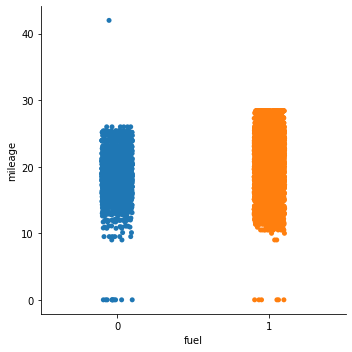

In [311]:
sns.catplot(x = 'fuel', y = 'mileage', data = car_data)

In [312]:
#car_data = car_data[car_data['max_power'] <= 140]


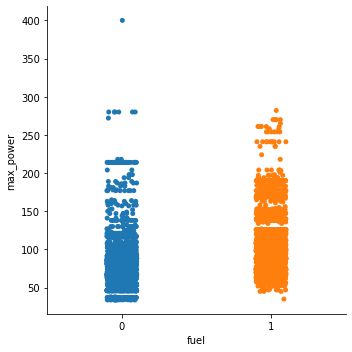

In [313]:
sns.catplot(x = 'fuel', y = 'max_power', data = car_data)

In [314]:
#car_data = car_data[car_data['seats'] <= 10]


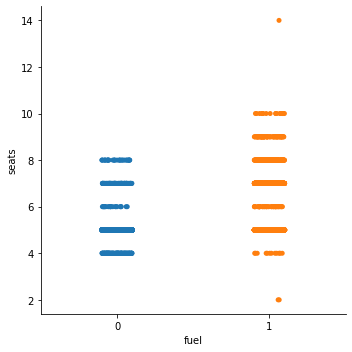

In [315]:
sns.catplot(x = 'fuel', y = 'seats', data = car_data)

In [316]:
#car_data=car_data[car_data['km_driven'] <= 220000]

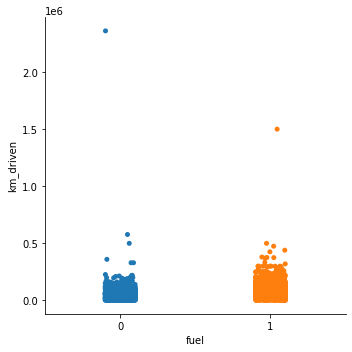

In [317]:
sns.catplot(x = 'fuel', y = 'km_driven', data = car_data)

In [318]:
#car_data=car_data[car_data['selling_price'] <= 600000]

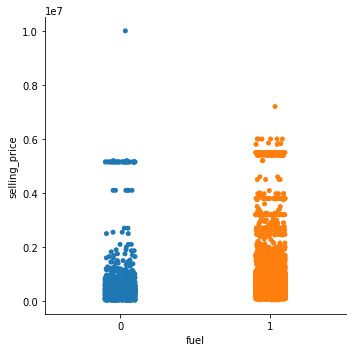

In [319]:

sns.catplot(x = 'fuel', y = 'selling_price', data = car_data)

In [320]:
X = car_data.iloc[:,1:]

y = car_data.iloc[:,0]


In [321]:
X

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,Car_Age
0,450000,145500,1,1,0,0,23.40,1248,74,5.0,8
1,370000,120000,1,1,0,1,21.14,1498,103,5.0,8
2,158000,140000,0,1,0,2,17.70,1497,78,5.0,16
3,225000,127000,1,1,0,0,23.00,1396,90,5.0,12
4,130000,120000,0,1,0,0,16.10,1298,88,5.0,15
...,...,...,...,...,...,...,...,...,...,...,...
8122,475000,80000,1,1,0,1,22.54,1396,88,5.0,8
8123,320000,110000,0,1,0,0,18.50,1197,82,5.0,9
8125,382000,120000,1,1,0,0,19.30,1248,73,5.0,13
8126,290000,25000,1,1,0,0,23.57,1396,70,5.0,9


In [322]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [323]:
X_train.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,Car_Age
1229,351000,89100,1,1,0,1,23.20,1248,73,5.0,8
584,500000,76000,1,1,0,0,15.96,2523,62,7.0,10
4320,2711000,9000,1,0,1,0,13.60,1999,177,5.0,5
5564,150000,90000,1,1,0,1,19.40,1405,70,5.0,9
7382,380000,50000,0,1,0,0,23.10,998,67,5.0,5


In [330]:
rf = RandomForestRegressor(n_estimators = 2500)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
r2_score(y_test, y_pred)


0.9999826410576076

In [326]:
linearRegression = LinearRegression()
linearRegression.fit(X_train, y_train)
y_pred = linearRegression.predict(X_test)
r2_score(y_test, y_pred)

1.0

In [277]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix 
print(np.mean(y_pred != y_test))
#print(confusion_matrix(y_test, y_pred))  
#print(classification_report(y_test, y_pred)) 
#print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

0.9615902964959568


In [278]:
car_data.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,Car_Age
0,450000,145500,1,1,0,0,23.40,1248,74,5.0,8
1,370000,120000,1,1,0,1,21.14,1498,103,5.0,8
2,158000,140000,0,1,0,2,17.70,1497,78,5.0,16
3,225000,127000,1,1,0,0,23.00,1396,90,5.0,12
4,130000,120000,0,1,0,0,16.10,1298,88,5.0,15


Loading Data then splitting into train and test sets